# Project 2

# Used Vehicle Price Prediction

### Angela Fernanda Romero Fonseca - 201819276
### Carolina Padilla Hernández -201111402
### Juan Camilo Florez Caro - 201620135
### Juan Fernando Ortiz Serrano- 200623117

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('dataTrain_carListings.csv')

In [3]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [4]:
data.shape

(500000, 6)

In [5]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

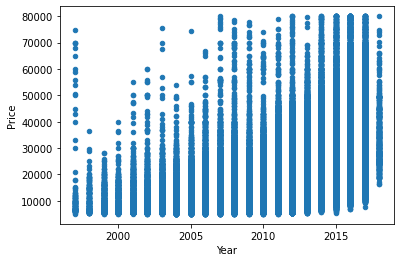

In [6]:
data.plot(kind='scatter', y='Price', x='Year')

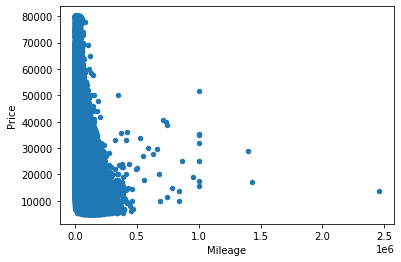

In [7]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [10]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process. 


#### Definición de X y y

In [8]:
# define features: exclude career statistics (which start with "C") and the response (Salary)
feature_cols = data[['Year', 'Mileage', 'State', 'Make', 'Model']]
feature_cols

,Year,Mileage,State,Make,Model
0,2014,31909,MD,Nissan,MuranoAWD
1,2016,25741,KY,Chevrolet,CamaroCoupe
2,2016,24633,SC,Hyundai,Santa
3,2012,84026,OK,Jeep,Grand
4,2013,22816,TN,Jeep,Wrangler
5,2017,5362,FL,Jeep,Wrangler
6,2010,69431,NH,Ford,F-1504WD
7,2015,35090,WI,Ford,ExplorerXLT
8,2012,35100,NY,Hyundai,Sonata4dr
9,2017,14238,TX,Kia,SorentoSX


In [19]:
#data['HighPrice'] = (data['Price'] > data['Price'].mean()).astype(int) #Modelo de clasificación
#data = data.drop(['Model', 'Price'], axis=1)
y.head()

0    21490
1    21250
2    20925
3    14500
4    32488
Name: Price, dtype: int64

In [9]:
# define X and y
X = feature_cols

In [10]:
y = data['Price']

In [11]:
print(X.head())
print(X.columns)

   Year  Mileage State       Make        Model
0  2014    31909    MD     Nissan    MuranoAWD
1  2016    25741    KY  Chevrolet  CamaroCoupe
2  2016    24633    SC    Hyundai        Santa
3  2012    84026    OK       Jeep        Grand
4  2013    22816    TN       Jeep     Wrangler
Index(['Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')


In [12]:
print(type(y))
print(type(X))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [13]:
X_1 = X[['Year','Mileage']]

In [14]:
X_2 = pd.get_dummies(X[['State','Make','Model']])

#### Después de categorizar las variables "State", "Model" y "Make", decidimos llevar a cabo un análisis de componentes prinicipales debido a la cantidad de dummies que se generan en el proceso

In [15]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_2)

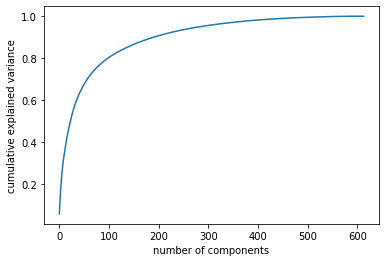

In [16]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Selección del número de componentes del PCA. Se escogen discrecionalmente 99 componentes

In [17]:
np_pca = np.cumsum(pca.explained_variance_ratio_)[99]
np_pca

0.8020774164260825

In [18]:
pca_2 = PCA(n_components=100)

In [19]:
pca_3 = pca_2.fit(X_2)

In [20]:
pca_3

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
componentes = []

for i in range(0,99):
    comp = np.dot(X_2, pca.components_[i])
    componentes.append(comp)

pcadf = pd.DataFrame(np.vstack((componentes)).T)
pcadf.shape

(500000, 99)

In [22]:
X = pd.merge(X_1,pcadf, left_index = True, right_index=True)

In [31]:
X.head()

,Year,Mileage,0,1,2,3,4,5,6,7,...,89,90,91,92,93,94,95,96,97,98
0,2014,31909,-0.003047,0.030986,-0.035649,0.025931,-0.013332,-0.032719,-0.027428,0.041287,...,0.005322,-0.072024,0.003497,-0.018186,-0.006448,-0.002154,-0.003061,-0.002536,-0.005590,-0.017480
1,2016,25741,0.728165,-0.527594,0.066863,-0.208215,-0.003349,0.111267,-0.056764,-0.064105,...,-0.004518,-0.076637,0.008371,0.144507,-0.005039,-0.000585,0.000688,0.004065,-0.007540,-0.010591
2,2016,24633,-0.002785,0.051216,-0.056949,0.037018,-0.025295,-0.075252,0.067372,0.101357,...,0.003022,-0.051158,-0.002731,-0.005505,-0.006542,0.000958,0.042528,0.004231,-0.002824,-0.011310
3,2012,84026,-0.004023,0.118829,-0.146807,0.216763,-0.071543,-0.678260,-0.135909,-0.852218,...,0.006508,-0.039833,-0.005243,-0.006302,-0.005954,-0.000491,0.000770,0.002537,-0.009887,-0.007103
4,2013,22816,-0.005781,0.094040,-0.119394,0.176684,-0.072932,-0.565185,-0.137398,-0.723208,...,0.003451,-0.041687,-0.000320,-0.008681,-0.003971,-0.000454,-0.000650,0.001404,-0.007438,-0.007732


### Definir train y test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### XGBoost: Construcción del modelo

In [25]:
#from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error

reg = xgb.XGBRegressor( random_state=42)

In [54]:
reg

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=42, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)

In [55]:
from sklearn import metrics

reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [56]:
y_pred = reg.predict(X_test)


In [61]:
mse=np.sqrt(mean_squared_error(y_test, y_pred))
mse
#metrics.f1_score(y_pred, y_test.values), metrics.accuracy_score(y_pred, y_test.values)

6997.20464535731

Sin modificar ninguno de los parámetros el mse es de 6,997.20.

### Mejores parámetros XGBoost 

<b>Max Depth: </b>Profundidad máxima de los árboles con XGBoost.

In [62]:
#f1 = []
#acc = []
depth= []
mse= []

for i in range(1, 11): 
    reg = xgb.XGBRegressor(random_state=42, max_depth=i)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    #f1.append(metrics.f1_score(y_pred, y_test.values))
    #acc.append(metrics.accuracy_score(y_pred, y_test.values))
    depth.append(i)

In [63]:
print(depth)
#print(f1)
print(mse)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[6997.20464535731, 6089.903680000138, 5507.824419988071, 5089.727321128476, 4763.452162583056, 4537.104905867489, 4321.626983902218, 4149.946111577435, 4042.582596528673, 3955.384685521761]


In [64]:
df = pd.DataFrame({'Depth':depth,'MSE':mse })
df[df['MSE']==min(df['MSE'])]

,Depth,MSE
9,10,3955.384686


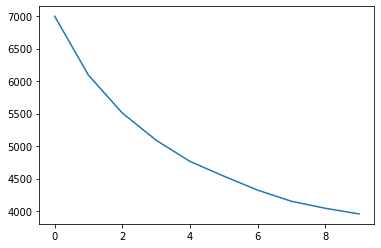

In [65]:
df['MSE'].plot()

Teniendo en cuenta los resultados obtenidos, iterando la máxima profundidad del XGBoost se considera que una profundidad óptima de 10 seria ideal para no caer en problemas de overfitting. 

<b>Número de estimadores: </b>Número de árboles secuenciales dentro del modelo XGBoost.

In [68]:
#f1 = []
#acc = []
estimators= []
mse= []

for i in range(1, 300,10): 
    reg = xgb.XGBRegressor(random_state=42, max_depth=10, n_estimators=i)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    #f1.append(metrics.f1_score(y_pred, y_test.values))
    #acc.append(metrics.accuracy_score(y_pred, y_test.values))
    estimators.append(i)

print(estimators)
#print(f1)
print(mse)

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271, 281, 291]
[17330.20118211352, 5046.121911465295, 4557.8796879466345, 4311.676467976063, 4196.366706709931, 4127.9277230567195, 4093.3671993666344, 4012.6587515801584, 3988.641835306995, 3974.60476316743, 3950.5747332372066, 3935.732429047117, 3922.085274002554, 3905.5359232196547, 3896.552133398501, 3888.7341468993495, 3879.4319904238896, 3870.9227141397787, 3867.403665267511, 3864.5431782451856, 3857.035262455465, 3852.737621118849, 3850.7915749024805, 3848.8376797311225, 3846.9030456848195, 3846.727360776481, 3846.5960131162005, 3845.579660734587, 3844.809877342771, 3844.3744095371812]


In [70]:
df = pd.DataFrame({'n_estimators':estimators,'MSE':mse })
df[df['MSE']==min(df['MSE'])]

,n_estimators,MSE
29,291,3844.37441


El número de árboles secuenciales dentro del modelo XGBoost es de 291.

<b>Learning rate: </b>Este parámetro es un factor de ponderación de cada árbol para corregir los errores de los árboles anteriores, cuando se agregan al modelo. Es decir, que reduce la influencia de cadar arbol individual par que los arboles futuros mejoren el modelo. Al tener un learning rate de 1 se utulizan todos los componentes (variables) del conjunto anterior. 

In [72]:
#f1 = []
mse = []
lr= []


for i in np.arange(0.01, 0.1, 0.01): 
    reg = xgb.XGBRegressor(random_state=42, max_depth=10, n_estimators =291, learning_rate=i)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    #f1.append(metrics.f1_score(y_pred, y_test.values))
    #acc.append(metrics.accuracy_score(y_pred, y_test.values))
    mse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    lr.append(i)
    
print(lr)
print(mse)
#print(acc)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.06999999999999999, 0.08, 0.09]
[5274.455762233392, 4534.619159820372, 4286.43376031134, 4145.575243835653, 4089.586324317274, 4028.654757956491, 3975.7474114981082, 3925.1112758173167, 3915.658937112199]


Text(0, 0.5, 'MSE')

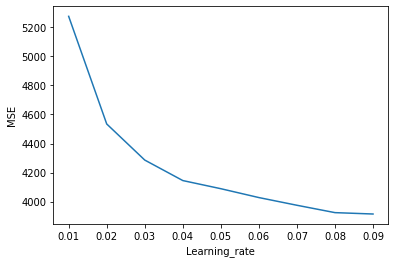

In [74]:
plt.plot(lr, mse)
plt.xlabel('Learning_rate')
plt.ylabel('MSE')

Se toma 0.08 ya que su mse es el más pequeño

<b>Colsample by tree:</b> Indica la proporción de las variables a usar (seleccionadas al azar) para entrenar cada arbol. 

In [75]:
mse = []
cl= []

for i in np.arange(0, 1, 0.1): 
    reg = xgb.XGBRegressor(random_state=42, max_depth=10, n_estimators =291, learning_rate=0.01, colsample_bytree=i )
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    cl.append(i)
    
print(cl)
print(mse)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]
[8770.22838794007, 6743.3539340421485, 6113.395182241126, 5753.511529492769, 5561.620483133955, 5431.916641476674, 5364.676322606659, 5321.8655582225665, 5300.144552229067, 5276.416505516932]


In [ ]:
df = pd.DataFrame({'Colsample_bytree':cl,'MSE':mse })
df[df['MSE']==min(df['MSE'])]

Text(0, 0.5, 'MSE')

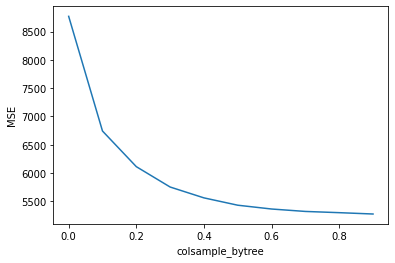

In [77]:
plt.plot(cl, mse)
plt.xlabel('colsample_bytree')
plt.ylabel('MSE')

De acuerdo al menor mse se procede a escoger el 60% de las variables.

### Modelo XGBoost con mejores parámetro

In [26]:
reg = xgb.XGBRegressor(random_state=42,max_depth=10, n_estimator=291, learning_rate=0.08, colsample_bytree=0.6)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse =np.sqrt(mean_squared_error(y_test, y_pred))

[21:34:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [93]:
print(mse)

4376.511956747956


El modelo XGBoost con los mejóres parámetros genera un mse de 4,376. El mse se redujo en comparación con el modelo inicial, dado que era 6,997.20.

### K-fold cross validation manual con el modelo de los mejores parámetros 

In [98]:
y_X = pd.merge(y, X, left_index = True, right_index = True)

In [99]:
k = 10
folds = np.array_split(y_X, k)

In [100]:
def perform(clf, train_set, test_set):
    # Extraer campos de Precio de train y de test
    train_labels = train_set.pop('Price').values
    test_labels = test_set.pop('Price').values
    reg.fit(train_set, train_labels)
    return clf.score(test_set, test_labels)

In [101]:
score = []
mse = []
for i in range(k):
    train = folds.copy() ## you wanna work on a copy of your array
    test = folds[i]
    del train[i]
    train = pd.concat(train, sort=False) 
    score.append(perform(reg, train.copy(), test.copy())) # sacar el mejor rendimiento
    mse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
print(score)
print(mse)

[16:35:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:39:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:43:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

In [102]:
average_score=sum(score)/10
average_mse=sum(mse)/10

print(average_mse)

4376.511956747956


Luego de hacer el 10-fold validation encontramos que el error cuadrático medio es de 4,376. Con una varianza total explicada promedio de 84%.

# Exercise P2.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine


#### Creación de la función para predecir el precio. El valor imputado a la función se pega a datacar_listings y con ello se calculan los 100 componentes principales necesarios para estimar el modelo. 

In [27]:
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn.decomposition import PCA
import sys
import os

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [28]:
def predict_price(year, mileage, state, make, model):
    # 
    reg = joblib.load(os.path.dirname(__file__) + '/price_reg.pkl')
    year_mil = pd.DataFrame(data = [[year,mileage]], columns = ['Year', 'Mileage']).astype(int)
    categoricas = pd.DataFrame(data = [[state, make, model]],columns = ['State', 'Make', 'Model']).astype(str)
    data_input = pd.merge(year_mil,categoricas, left_index = True, right_index=True)
    #print(data_input)
    
    data = pd.read_csv('dataTrain_carListings.csv')
    
    data = data.append(data_input)
    
    X_2 = pd.get_dummies(data[['State', 'Make', 'Model']])
    pca = PCA(n_components = 100).fit(X_2)
    #print(pca)
    
    componentes = []
    
    for i in range(0,99):
        comp = np.dot(X_2[-1:], pca.components_[i])
        componentes.append(comp)
    pcadf = pd.DataFrame(np.vstack((componentes)).T)
    
    X = pd.merge(year_mil, pcadf, left_index = True, right_index=True)
    #print(X)
    
    #Make prediction
    pred_precio = reg.predict(X)
    
    return pred_precio

if __name__ == "__main__":
    
    pred_precio = predict_price(year, mileage, state, make, model)
    print(year, mileage, state, make, model)
    print("Precio pronosticado", pred_precio)

NameError: name 'year' is not defined

#### Creación del pickle.

In [29]:
from sklearn.externals import joblib

joblib.dump(reg, 'model_deployment/price_reg.pkl', compress=3)

['model_deployment/price_reg.pkl']

In [30]:
from model_deployment.model_deployment_price import predict_price

In [31]:
#import sys
#del sys.modules["model_deployment.model_deployment_price"]

#### Al llamar la función predict_price sobre un Jeep Wrangler a venderse en Tenesse con 100mil millas de distancia recorrida y del año 1997, el modelo entrenado arroja un valor pronosticado de 14.821 dólares.

In [32]:
predict_price('1997', '100000', 'TN', 'Jeep', 'Wrangler')

C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


array([15078.264], dtype=float32)

#### Creación de la API con flask-restx

In [33]:
from flask import Flask
from flask_restx import Api, Resource, fields
from sklearn.externals import joblib

In [34]:
app = Flask(__name__)

api = Api(
    app,
    version='1.0',
    title = 'Prediciendo el precio de un automóvil',
    description = 'Modelo XGBoost para predecir el precio')

ns = api.namespace('predict', 
     description='Auto price predictor')
   
parser = api.parser()

parser.add_argument(
    'Year/Año', 
    type=int, 
    required=True, 
    help='Año/Modelo del vehículo', 
    location='args')

parser.add_argument(
    'Mileage/Millaje', 
    type=int, 
    required=True, 
    help='Millas recorridas en el vehículo', 
    location='args')

parser.add_argument(
    'State/Estado', 
    type=str, 
    required=True, 
    help='Estado de los Estados Unidos de América. Ingresar un argumento de máximo 2 posiciones', 
    location='args')

parser.add_argument(
    'Make/Fabricante', 
    type=str, 
    required=True, 
    help='Fabricante del vehículo', 
    location='args')

parser.add_argument(
    'Model', 
    type=str, 
    required=True, 
    help='Modelo del vehículo', 
    location='args')


resource_fields = api.model('Resource', {
    'result': fields.String,
})

In [35]:
from model_deployment.model_deployment_price import predict_price

In [36]:
@ns.route('/')

class PriceApi(Resource):

    @api.doc(parser=parser)
    @api.marshal_with(resource_fields)
    def get(self):
        args = parser.parse_args()
        
        years = args['Year/Año'] 
        mil = args['Mileage/Millaje'] 
        stat = args['State/Estado']
        meik = args['Make/Fabricante']
        mod = args['Model']
        return {
         "result": predict_price(years, mil, stat, meik, mod)
        }, 200
    
    
if __name__ == '__main__':
    app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)


### Resultados del cargue de la API en AWS

![title](API_0.png)

![title](API_1.png)

![title](API_2.png)

### Resultados de la API en localhost:5000 (no AWS)

![title](API_4.png)

![title](API_3.png)

#### URL de la API:

http://ec2-18-218-202-150.us-east-2.compute.amazonaws.com:5000/